In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#reading the csv file 
eData = pd.read_csv("fer2013.csv") #put in the csv file name here

#DATASET
#Spliting the Dataset
X_train = []  # for pixels
Y_train = []  # for labels
X_test = []  
Y_test = []   #labels for testing, x_test and Y_test 
for index, row in eData.iterrows(): #data of the whole row
    k = row['pixels'].split(" ")   #list of the pixels 
    try:
        if row['Usage'] == 'Training':              #for training
            X_train.append(np.array(k,'float32'))
            Y_train.append(row['emotion'])
        elif row['Usage'] == 'PublicTest':          # for testing from the public testing 
            X_test.append(np.array(k,'float32'))
            Y_test.append(row['emotion'])
    except:
        print(f"error occured at index:{index} and row:{row}")           

#ADJUSTING THE DATASET
#Converting Lists to Numpy arrays
X_train = np.array(X_train,'float32')
Y_train = np.array(Y_train, 'float32')
X_test = np.array(X_test,'float32')
Y_test = np.array(Y_test,'float32')


#Normalizing the data between 0 and 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train,axis=0)
X_test -= np.mean(X_test, axis=0) #subtracting dataset by the mean and the dividing
X_test /= np.std(X_test,axis=0)

#Reshaping the array to be passed to the model
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) #shaping the pixels
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

#Convert the labels to categorical ones
Y_train = np_utils.to_categorical(Y_train, num_classes=7)
Y_test  = np_utils.to_categorical(Y_test,num_classes=7)

#BUILDING THE CNN MODEL
model = Sequential()


model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3), padding="same",activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))                   #Droupout helps in reducing the overfitting of the model
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()       #only for printing purposes 

#Compiling the Model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

#TRAINING THE MODEL
batch = 32             #takes data in batches of 32, not entire dataset
epoch = 30             # the # times we pass the data to the model

history = model.fit(X_train, Y_train, batch_size=batch, epochs=epoch, verbose=1, validation_data=(X_test, Y_test), shuffle=True)
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics) # printing the model evaluation

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
TYELLOW = '\033[0;43m'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                    

Used for Testing the Model

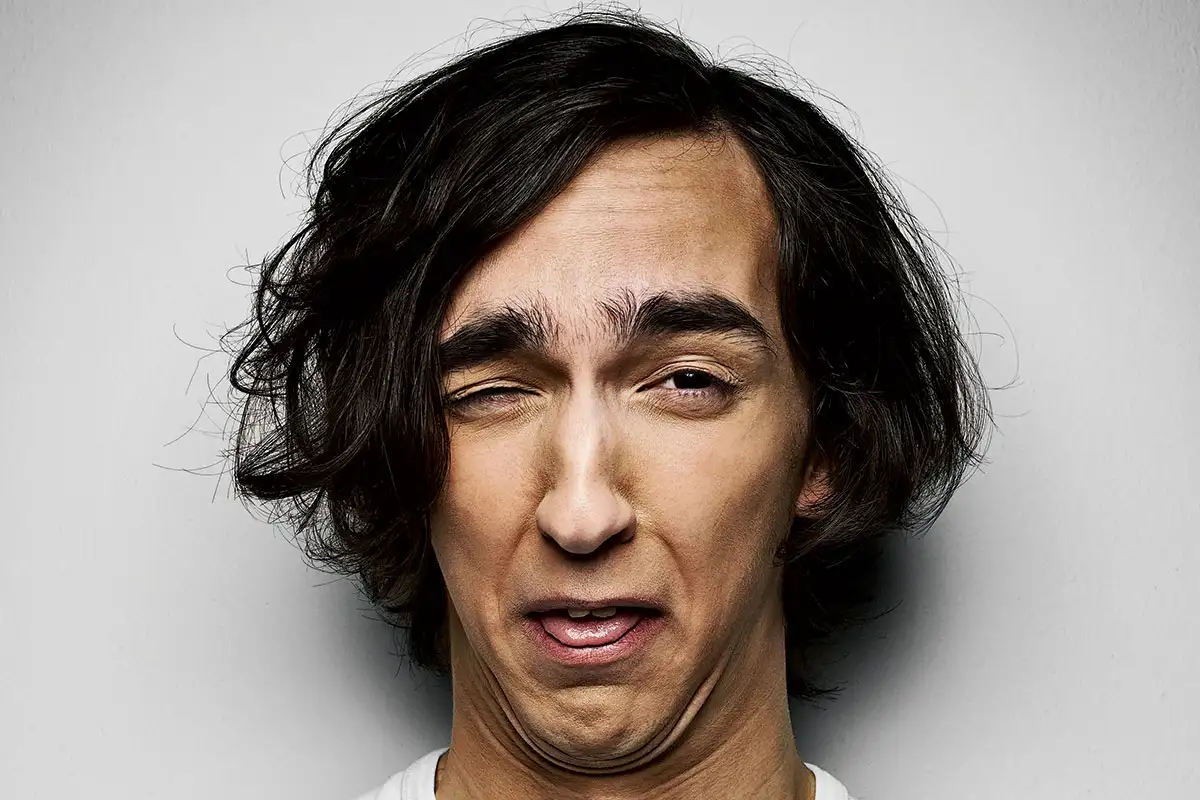



5 = surprise


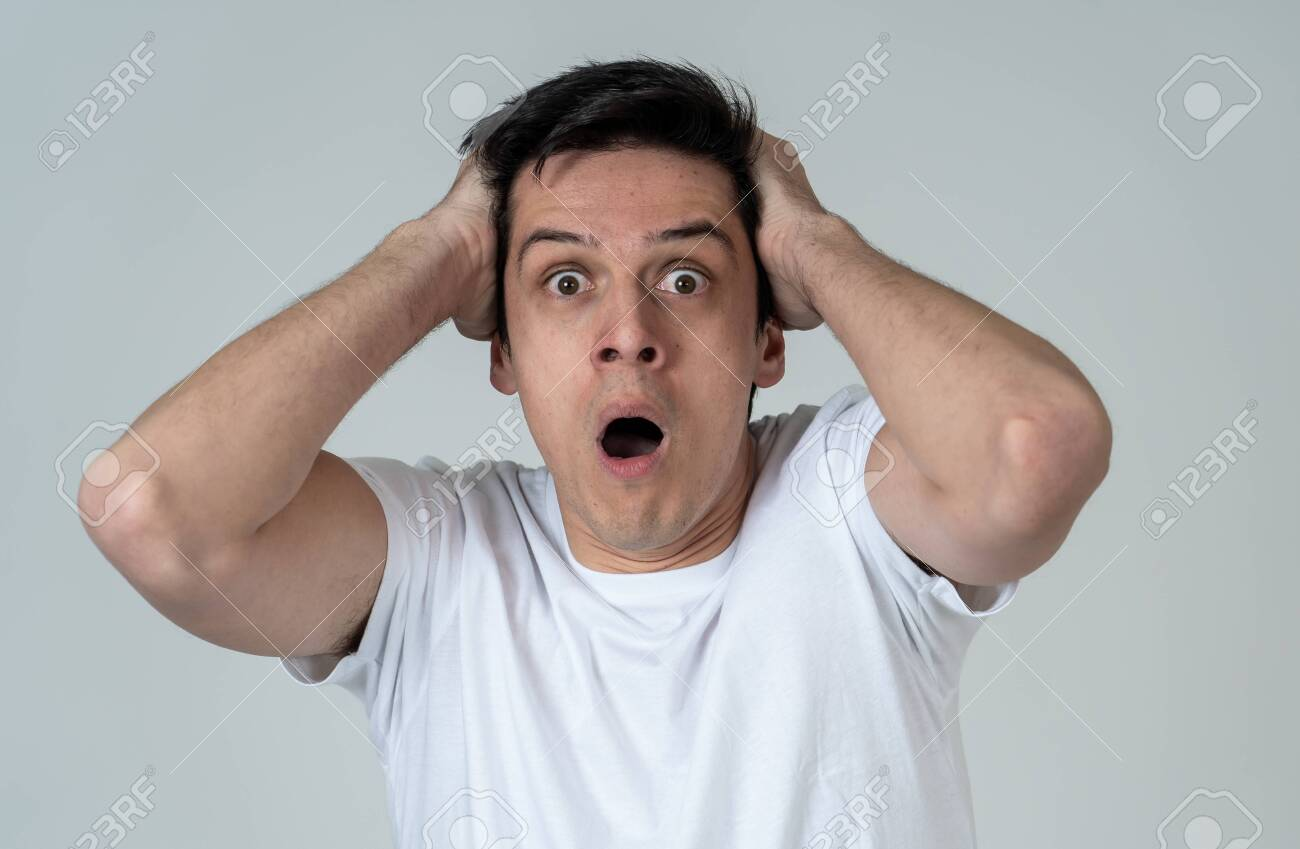



5 = surprise


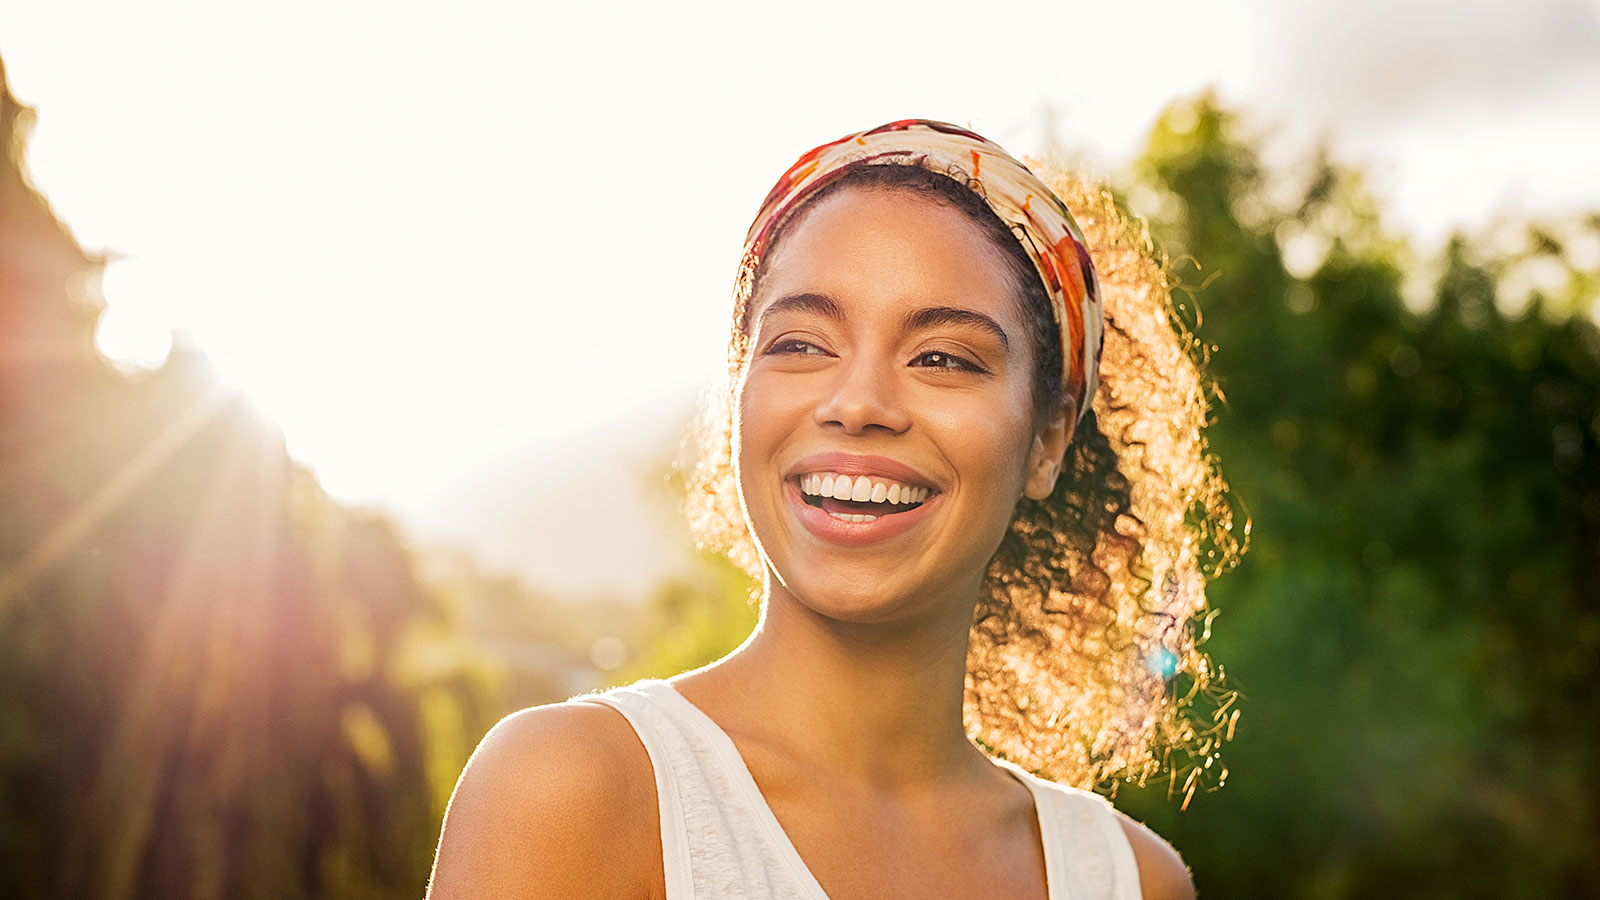



5 = surprise


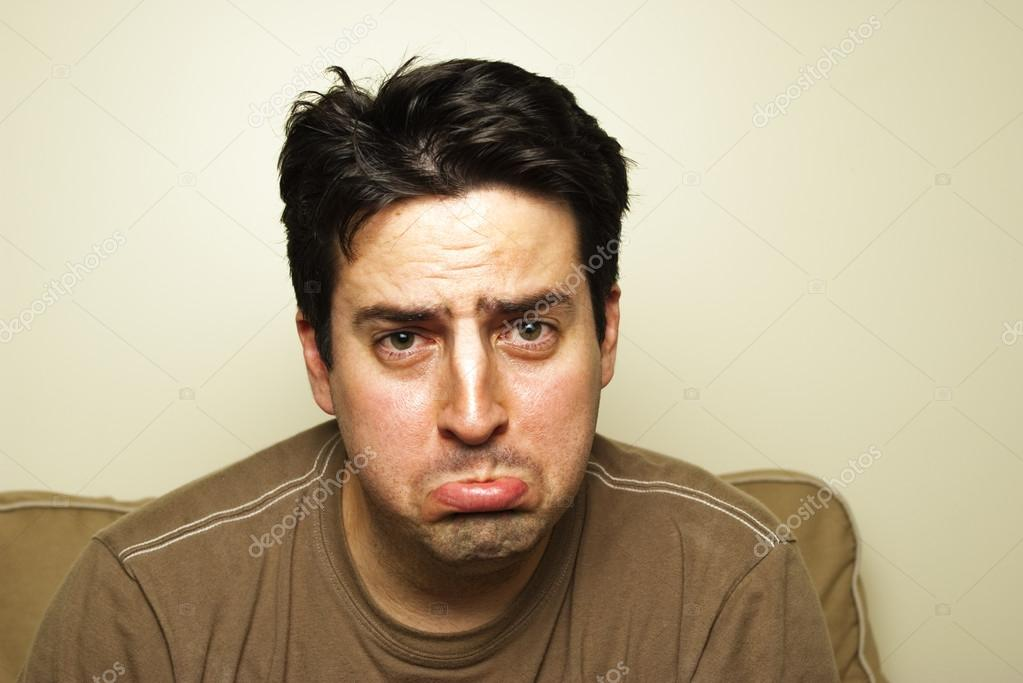



6 = neutral
Saved model to disk


In [2]:
#testing the model with pictures of face
for i in range (1,5):
  img_directory = str(i) + '.jpg'
  img_data = image.load_img(img_directory, target_size = (48, 48))   #load the image from the directory
  img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
  img_data = tf.image.rgb_to_grayscale(img_data)

  img_data = np.expand_dims(img_data, axis = 0)
  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  max_index = np.argmax(classify[0]) #takes predication and finds maxiumum probabilty 
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]  
  
  if(max_index == 3 or max_index == 5):
    print(TGREEN + str(max_index) + ' = ' +  emotion_prediction)
  elif(max_index == 4 or max_index == 2 or max_index == 0):
    print(TRED + str(max_index) + ' = ' +  emotion_prediction)
  else:
    print(TYELLOW + str(max_index) + ' = ' +  emotion_prediction)

model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
  model.save_weights("model.h5")

print("Saved model to disk")

Processing emotions in a Video

INFO:fer:30.00 fps, 647 frames, 21.57 seconds
INFO:fer:Making directories at output
100%|██████████| 647/647 [14:12<00:00,  1.32s/frames]
INFO:fer:Completed analysis: saved to output/video_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 7%
INFO:fer:Compressing: 15%
INFO:fer:Compressing: 23%
INFO:fer:Compressing: 30%
INFO:fer:Compressing: 38%
INFO:fer:Compressing: 46%
INFO:fer:Compressing: 54%
INFO:fer:Compressing: 61%
INFO:fer:Compressing: 69%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 92%
INFO:fer:Zip has finished


,Human Emotions,Emotion Value from the Video
0,Angry,0.47
1,Disgust,0.00
2,Fear,0.34
3,Happy,1.15
4,Sad,0.32
5,Surprise,0.14
6,Neutral,0.57


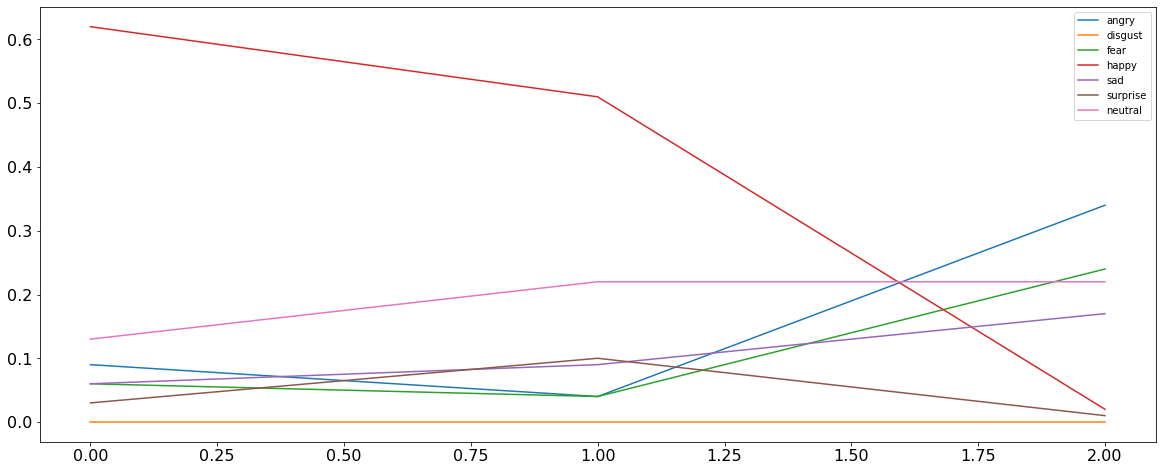

In [ ]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

# location of the video 
location_videofile = "video.mp4"

# face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# analysis on every frame of the input video. 
# create a rectangular box around every image and show the emotion values next to that
# publish a new video that will have a box around the face of the human with live emotion values
processing_data = input_video.analyze(face_detector, display=False)

# convert the analysed information into a dataframe.
# it will import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# plotting the emotions at the time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# uses dataframe to extract which emotion was high in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons